In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Load the logged requests
df = pd.read_csv("user_requests_log.csv", names=["user_id", "timestamp", "ip"])
# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
# set timestamp as index
df.set_index("timestamp", inplace=True)

In [33]:
# Set threshold
threshold = 150  # Number of requests per minute
user_id_threshold = 10

In [34]:
ip_minute_counts = (
    df.groupby("ip")
    .resample("1T")
    .size()
    .reset_index()
    .rename(columns={0: "request_count"})
)

userId_minute_counts = (
    df.groupby("user_id")
    .resample("1T")
    .size()
    .reset_index(name="request_count")
)

print(ip_minute_counts.head())
print(userId_minute_counts.head())

timestamp             ip  2025-04-25 23:18:00  2025-04-25 23:19:00  \
0          128.2.204.215                  103                  165   

timestamp  2025-04-25 23:20:00  2025-04-25 23:21:00  2025-04-25 23:22:00  \
0                          148                  153                  159   

timestamp  2025-04-25 23:23:00  2025-04-25 23:24:00  2025-04-25 23:25:00  \
0                          165                  147                  152   

timestamp  2025-04-25 23:26:00  ...  2025-04-25 23:37:00  2025-04-25 23:38:00  \
0                          155  ...                  164                  152   

timestamp  2025-04-25 23:39:00  2025-04-25 23:40:00  2025-04-25 23:41:00  \
0                          148                  169                  160   

timestamp  2025-04-25 23:42:00  2025-04-25 23:43:00  2025-04-25 23:44:00  \
0                          158                  151                  153   

timestamp  2025-04-25 23:45:00  2025-04-25 23:46:00  
0                          129

In [35]:
ip_minute_counts_melted = ip_minute_counts.melt(id_vars="ip", var_name="timestamp", value_name="request_count")
print(ip_minute_counts_melted.head())

              ip           timestamp  request_count
0  128.2.204.215 2025-04-25 23:18:00            103
1  128.2.204.215 2025-04-25 23:19:00            165
2  128.2.204.215 2025-04-25 23:20:00            148
3  128.2.204.215 2025-04-25 23:21:00            153
4  128.2.204.215 2025-04-25 23:22:00            159


In [36]:
# Filter IPs with request counts above the threshold
flagged_ips_df = ip_minute_counts_melted[ip_minute_counts_melted["request_count"] > threshold]
print("Flagged users based on request frequency:")
print(flagged_ips_df)

suspicious_ips = flagged_ips_df["ip"].unique()
print("Suspicious IPs:")
print(suspicious_ips)

Flagged users based on request frequency:
               ip           timestamp  request_count
1   128.2.204.215 2025-04-25 23:19:00            165
3   128.2.204.215 2025-04-25 23:21:00            153
4   128.2.204.215 2025-04-25 23:22:00            159
5   128.2.204.215 2025-04-25 23:23:00            165
7   128.2.204.215 2025-04-25 23:25:00            152
8   128.2.204.215 2025-04-25 23:26:00            155
10  128.2.204.215 2025-04-25 23:28:00            186
11  128.2.204.215 2025-04-25 23:29:00            158
13  128.2.204.215 2025-04-25 23:31:00            154
15  128.2.204.215 2025-04-25 23:33:00            181
16  128.2.204.215 2025-04-25 23:34:00            160
19  128.2.204.215 2025-04-25 23:37:00            164
20  128.2.204.215 2025-04-25 23:38:00            152
22  128.2.204.215 2025-04-25 23:40:00            169
23  128.2.204.215 2025-04-25 23:41:00            160
24  128.2.204.215 2025-04-25 23:42:00            158
25  128.2.204.215 2025-04-25 23:43:00            151
26  

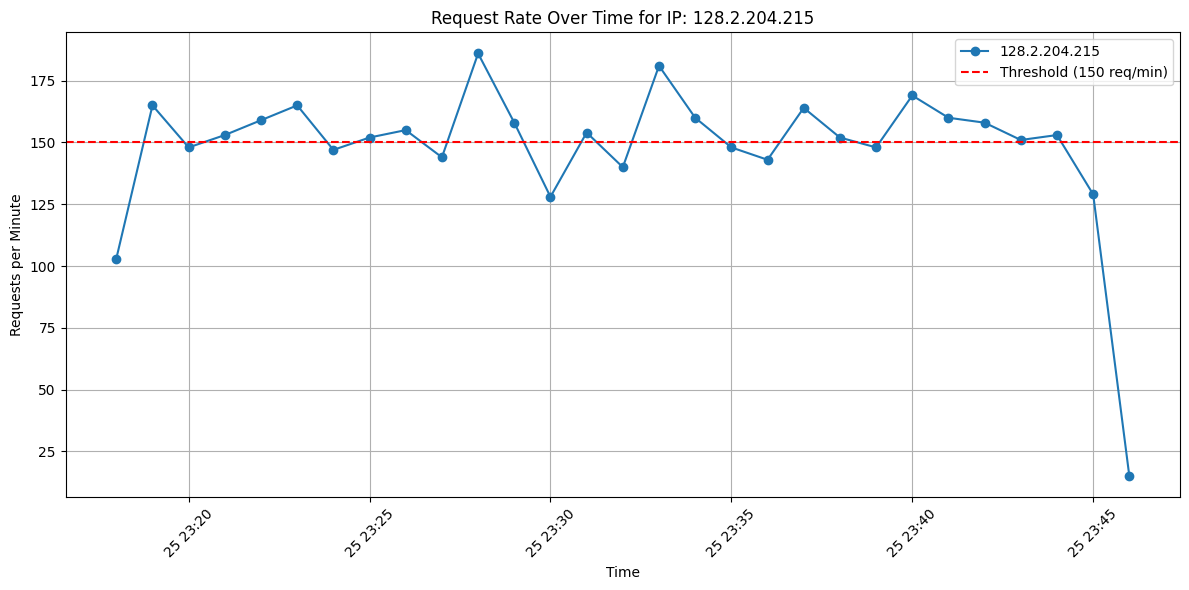

In [37]:
# Plot request rate over time for each suspicious IP
for ip in suspicious_ips:
    ip_data = ip_minute_counts_melted[ip_minute_counts_melted["ip"] == ip]
    
    plt.figure(figsize=(12,6))
    plt.plot(ip_data["timestamp"], ip_data["request_count"], marker='o', label=f"{ip}")
    plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold ({threshold} req/min)')
    
    plt.title(f"Request Rate Over Time for IP: {ip}")
    plt.xlabel("Time")
    plt.ylabel("Requests per Minute")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [38]:
# Filter IPs with request counts above the threshold
flagged_user_ids_df = userId_minute_counts[userId_minute_counts["request_count"] > user_id_threshold]
print("Flagged users based on extremly high request frequency for user Id:")
print(flagged_user_ids_df)

suspicious_user_ids = flagged_user_ids_df["user_id"].unique()
print("Suspicious user id:")
print(suspicious_user_ids)

Flagged users based on extremly high request frequency for user Id:
Empty DataFrame
Columns: [user_id, timestamp, request_count]
Index: []
Suspicious user id:
[]
